#Load and Inspect

In this project, we will analyze the Aviation_Data.csv to be able to advise our client who is intrested in diversifying his business into aviation sector to be able to identify the lowest risk planes that he can buy.

# Objectives

The objectives for this project are:
   -To identify airplanes with low risk based on their make and model
   -To compare safety of the planes by make and model.
   -To analyze and undertand safety and performance of the planes using engine number and engine type
   -To determine geographica risk patterns that 

# Part 1: Pandas

In [751]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/Aviation_Data.csv')

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [752]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [753]:
df_copy = df.copy()

#Identifying duplicates

In [754]:
df.duplicated().sum()

1390

#dropping duplicates

In [755]:
df.drop_duplicates(inplace=True)


# To confirm that the duplicated have been dropped

In [756]:
df.duplicated().sum()

0

# Handling missing data

In [757]:
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [758]:
# percentage of missing values per column
df.isna().sum()/len(df)

Event.Id                  0.000776
Investigation.Type        0.000000
Accident.Number           0.000776
Event.Date                0.000776
Location                  0.001360
Country                   0.003316
Latitude                  0.613503
Longitude                 0.613604
Airport.Code              0.435138
Airport.Name              0.406574
Injury.Severity           0.012017
Aircraft.damage           0.036680
Aircraft.Category         0.637053
Registration.Number       0.015580
Make                      0.001484
Model                     0.001810
Amateur.Built             0.001922
Number.of.Engines         0.069167
Engine.Type               0.080330
FAR.Description           0.640021
Schedule                  0.858562
Purpose.of.flight         0.070382
Air.carrier               0.812856
Total.Fatal.Injuries      0.128937
Total.Serious.Injuries    0.141404
Total.Minor.Injuries      0.134918
Total.Uninjured           0.067234
Weather.Condition         0.051271
Broad.phase.of.fligh

In [759]:
#removing whitespaces in my columns before dropping
df.columns = df.columns.str.strip()

In [760]:
# columns with missing values to drop
columns_to_drop = ['Latitude','Airport.Code','Airport.Name','Longitude','FAR.Description','Aircraft.Category','Air.carrier','Broad.phase.of.flight','Publication.Date','Schedule']

In [761]:
df = df.drop(columns= columns_to_drop)

df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause


In [762]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# finding mean, mode, and median values for my numerical columns

For numerical columns, the NaN values are kept because they could clearly mean that
 -Total fatal injuries-either were not recorded or or there was simply no fatal injuries. The same applies for the other columns. Therefore, by keeping the NaN values, it will help in diriving insights.

In [763]:
df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [764]:
### deriving the fatal count from the Injury severity
df['Fatal.count'] = df['Injury.Severity'].str.extract(r'Fatal\((\d+)\)')
df['Fatal.count']

0          2
1          4
2          3
3          2
4          1
        ... 
90343    NaN
90344    NaN
90345    NaN
90346    NaN
90347    NaN
Name: Fatal.count, Length: 88958, dtype: object

In [765]:
df['Fatal.count'].unique()

array(['2', '4', '3', '1', nan, '8', '78', '7', '6', '5', '153', '12',
       '14', '23', '10', '11', '9', '17', '13', '29', '70', '135', '31',
       '256', '25', '82', '156', '28', '18', '43', '15', '270', '144',
       '174', '111', '131', '20', '73', '27', '34', '87', '30', '16',
       '47', '56', '37', '132', '68', '54', '52', '65', '72', '160',
       '189', '123', '33', '110', '230', '97', '349', '125', '35', '228',
       '75', '104', '229', '80', '217', '169', '88', '19', '60', '113',
       '143', '83', '24', '44', '64', '92', '118', '265', '26', '138',
       '206', '71', '21', '46', '102', '115', '141', '55', '121', '45',
       '145', '117', '107', '124', '49', '154', '96', '114', '199', '89',
       '57'], dtype=object)

In [766]:
# Column for No. of Engines has a placeholder 0. Convering this placeholders to Nan.
df['Number.of.Engines'] = df['Number.of.Engines'].replace(0,np.nan)

In [767]:
#cols= ['Number.of.Engines',','Total.Serious.Injuries','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured']

cols= ['Number.of.Engines','Fatal.count']
#Getting the medians
medians={col: df[col].median() for col in cols}

#filling the numerical columns
for col in cols:
    df[col].fillna(medians[col],inplace=True)

In [768]:
df['Fatal.count'].unique()

array(['2', '4', '3', '1', 2.0, '8', '78', '7', '6', '5', '153', '12',
       '14', '23', '10', '11', '9', '17', '13', '29', '70', '135', '31',
       '256', '25', '82', '156', '28', '18', '43', '15', '270', '144',
       '174', '111', '131', '20', '73', '27', '34', '87', '30', '16',
       '47', '56', '37', '132', '68', '54', '52', '65', '72', '160',
       '189', '123', '33', '110', '230', '97', '349', '125', '35', '228',
       '75', '104', '229', '80', '217', '169', '88', '19', '60', '113',
       '143', '83', '24', '44', '64', '92', '118', '265', '26', '138',
       '206', '71', '21', '46', '102', '115', '141', '55', '121', '45',
       '145', '117', '107', '124', '49', '154', '96', '114', '199', '89',
       '57'], dtype=object)

In [769]:
# replacing Nan values in numerical columns with 0
cols= ['Total.Serious.Injuries','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured']


#filling the numerical columns with 0
for col in cols:
    df[col].fillna(0,inplace=True)

In [770]:
#df['Number.of.Engines'].fillna(df['Number.of.Engines'].median(),inplace=True)

#df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(),inplace=True)

#df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(),inplace=True)

#df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(),inplace=True)

#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)


In [771]:
# converting columns with floats to integers

df['Number.of.Engines'] = df['Number.of.Engines'].astype(int)
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].astype(int)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].astype(int)
df['Total.Uninjured'] = df['Total.Uninjured'].astype(int)
df['Fatal.count'] = df['Fatal.count'].astype(int)

# Filling the categorical data

In [772]:
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [773]:
# repacing the placeholders in Engine.Type with NaN
df['Engine.Type'] = df['Engine.Type'].replace(['NONE','None'],np.nan)

df['Engine.Type']

0        Reciprocating
1        Reciprocating
2        Reciprocating
3        Reciprocating
4                  NaN
             ...      
90343              NaN
90344              NaN
90345              NaN
90346              NaN
90347              NaN
Name: Engine.Type, Length: 88958, dtype: object

In [774]:
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'UNK'], dtype=object)

In [775]:
# cleaning engine type
# combining UNK and Unk
def convert_unk(value):
    if value =='UNK':
        return 'Unknown'
    else:
        return value
    
#To apply the function to the specific column
df['Engine.Type'] = df['Engine.Type'].map(convert_unk)

df['Engine.Type']

0        Reciprocating
1        Reciprocating
2        Reciprocating
3        Reciprocating
4                  NaN
             ...      
90343              NaN
90344              NaN
90345              NaN
90346              NaN
90347              NaN
Name: Engine.Type, Length: 88958, dtype: object

In [823]:
def convert_unk(value):
    if value =='LR':
        return 'Unknown'
    else:
        return value
    
#To apply the function to the specific column
df['Engine.Type'] = df['Engine.Type'].map(convert_unk)

df['Engine.Type']

0        Reciprocating
1        Reciprocating
2        Reciprocating
3        Reciprocating
4              Unknown
             ...      
90343          Unknown
90344          Unknown
90345          Unknown
90346          Unknown
90347          Unknown
Name: Engine.Type, Length: 88453, dtype: object

In [824]:
df['Engine.Type'].value_counts()

Reciprocating      69374
Unknown             8989
Turbo Shaft         3522
Turbo Prop          3379
Turbo Fan           2465
Turbo Jet            701
Geared Turbofan       12
Electric              10
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [778]:
cols_to_fill= ['Registration.Number','Engine.Type','Location','Injury.Severity','Aircraft.damage','Aircraft.damage','Weather.Condition','Report.Status','Purpose.of.flight']

df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')

#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)
#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)
#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)
#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)
#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)
#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)
#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)
#df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)

#df['Country'].fillna("UNKNOWN",inplace=True)
#df['Location'].fillna("UNKNOWN",inplace=True)
#df['Injury.Severity'].fillna("UNKNOWN",inplace=True)
#df['Aircraft.damage'].fillna("UNKNOWN",inplace=True)
#df['Aircraft.damage'].fillna("UNKNOWN",inplace=True)
#df['Amateur.Built'].fillna("UNKNOWN",inplace=True)
#df['Weather.Condition'].fillna("UNKNOWN",inplace=True)
#df['Report.Status'].fillna("UNKNOWN",inplace=True)
#df['Purpose.of.flight'].fillna("UNKNOWN",inplace=True)



#dropping rows with missing values

In [779]:
df= df.dropna(subset=['Event.Id','Accident.Number','Event.Date','Make','Model','Country','Amateur.Built'])


#df['Event.Id'] = df.dropna(subset=['Event.Id'])
#df['Accident.Number'] = df.dropna(subset=['Accident.Number'])
#df['Event.Date'] = df.dropna(subset=['Event.Date'])
#df['Make'] = df.dropna(subset=['Make'])
#df['Engine.Type'] = df.dropna(subset=['Engine.Type'])
#df['Model'] = df.dropna(subset=['Model'])



In [780]:
# Ccinfirming if all missing values have been handled
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Fatal.count               0
dtype: int64

In [781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88453 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88453 non-null  object
 1   Investigation.Type      88453 non-null  object
 2   Accident.Number         88453 non-null  object
 3   Event.Date              88453 non-null  object
 4   Location                88453 non-null  object
 5   Country                 88453 non-null  object
 6   Injury.Severity         88453 non-null  object
 7   Aircraft.damage         88453 non-null  object
 8   Registration.Number     88453 non-null  object
 9   Make                    88453 non-null  object
 10  Model                   88453 non-null  object
 11  Amateur.Built           88453 non-null  object
 12  Number.of.Engines       88453 non-null  int32 
 13  Engine.Type             88453 non-null  object
 14  Purpose.of.flight       88453 non-null  object
 15  To

In [782]:
df['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [783]:
# stripping the columns
df.columns= df.columns.str.strip()

In [784]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].astype(str)

In [785]:
# mapping of Purpose.of.flight column

def purpose_mapper(purpose):
    if purpose in ['Personal','Instructional','Glider Tow','Executive/corporate','Skydiving']:
         return 'Private'
    elif purpose in ['Business','Ferry','Aerial Observation','Aerial Application','Public Aircraft','Other Work Use','Positioning','Flight Test','Air Race/show',
                   'Air Drop','Public Aircraft - Federal','Glider Tow','Public Aircraft - Local','External Load','Public Aircraft - State', 'Banner Tow',
                   'Firefighting','Air Race show','PUBS','ASHO','PUBL']:
        return 'Commercial'
    else:
        return 'Unknown'


In [786]:

df['Flight.Category'] = df['Purpose.of.flight'].map(purpose_mapper)

In [787]:
df['Flight.Category'].unique()

array(['Private', 'Unknown', 'Commercial'], dtype=object)

# ANALYSIS

# # Objective 1: To identify Aircrafts models and make with their make and model

AGGREGATION.

In [788]:
df.groupby('Model')[['Fatal.count','Total.Serious.Injuries','Total.Minor.Injuries']].mean()

,Fatal.count,Total.Serious.Injuries,Total.Minor.Injuries
Model,,,
&GCBC,2.0,0.0,0.0
(EX) RV-6,2.0,0.0,0.0
(MODIFIED),1.0,0.0,0.0
(SOLOY CONVERSION),2.0,0.0,0.0
-269C,2.0,0.0,0.0
...,...,...,...
lebed,2.0,0.0,0.0
none,1.0,1.0,0.0
sportstar,2.0,0.0,0.0


## Objective 2: To evaluate the impact of number of engines and engine type in relation to safety.

df.groupby('Number.of.Engines')['Aircraft.damage'].value_counts(normalize=True)

In [789]:
df.groupby('Number.of.Engines')['Aircraft.damage'].value_counts(normalize=True)

Number.of.Engines  Aircraft.damage
1                  Substantial        0.756509
                   Destroyed          0.203164
                   Unknown            0.022913
                   Minor              0.017414
2                  Substantial        0.529792
                   Destroyed          0.259165
                   Unknown            0.112253
                   Minor              0.098790
3                  Minor              0.404612
                   Unknown            0.324948
                   Substantial        0.218029
                   Destroyed          0.052411
4                  Minor              0.337209
                   Substantial        0.265116
                   Unknown            0.265116
                   Destroyed          0.132558
6                  Substantial        1.000000
8                  Substantial        0.666667
                   Unknown            0.333333
Name: Aircraft.damage, dtype: float64

In [ ]:
damage = df.groupby('Number.of.Engines')['Aircraft.damage'].value_counts(normalize=True)

In [827]:
fatal_distribution = (
    df.groupby('Engine.Type')['Fatal.count']
.value_counts(normalize=True)
.sort_values(ascending=False)
.reset_index(name='Percentage')
)

In [828]:
print(fatal_distribution)

         Engine.Type  Fatal.count  Percentage
0           Electric            2    1.000000
1    Geared Turbofan            2    1.000000
2      Hybrid Rocket            2    1.000000
3          Turbo Fan            2    0.956592
4            Unknown            2    0.915007
..               ...          ...         ...
175    Reciprocating            9    0.000029
176    Reciprocating           14    0.000014
177    Reciprocating           17    0.000014
178    Reciprocating           27    0.000014
179    Reciprocating           82    0.000014

[180 rows x 3 columns]


In [ ]:
## Aggregating the above output to be neat
combined_fatal = (
    df.groupby('Engine.Type',as_index=False)['Fatal.count']
      .sum()
    .sort_values(by='Fatal.count',ascending=True)
)

print(combined_fatal)

       Engine.Type  Fatal.count
2    Hybrid Rocket            2
0         Electric           20
1  Geared Turbofan           24
5        Turbo Jet         1981
7      Turbo Shaft         7065
6       Turbo Prop         7488
4        Turbo Fan         8509
8          Unknown        24881
3    Reciprocating       136986


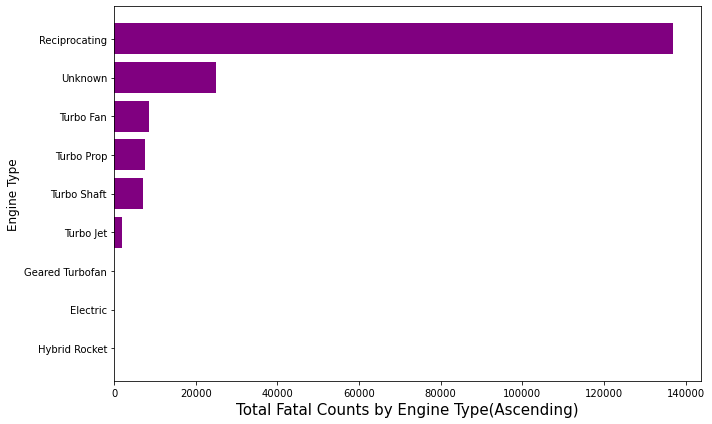

In [842]:
#visualization for this
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

combined_fatal = (
    df.groupby('Engine.Type',as_index=False)['Fatal.count']
      .sum()
    .sort_values(by='Fatal.count',ascending=True)
)

fig,ax = plt.subplots(figsize=(10,6))


ax.barh(combined_fatal['Engine.Type'],combined_fatal['Fatal.count'], color='purple')

#labels and titles
ax.set_xlabel('Total Fatal Count', fontsize=12)
ax.set_ylabel('Engine Type', fontsize=12)
ax.set_xlabel('Total Fatal Counts by Engine Type(Ascending)', fontsize=15)

# making the layout tidy
plt.tight_layout()

plt.show()

# Objective 3

In [826]:
df.groupby('Engine.Type')['Aircraft.damage'].value_counts(normalize=True)

Engine.Type      Aircraft.damage
Electric         Substantial        0.800000
                 Destroyed          0.200000
Geared Turbofan  Unknown            0.916667
                 Minor              0.083333
Hybrid Rocket    Destroyed          1.000000
Reciprocating    Substantial        0.774195
                 Destroyed          0.208623
                 Minor              0.012267
                 Unknown            0.004915
Turbo Fan        Unknown            0.356592
                 Substantial        0.295335
                 Minor              0.269371
                 Destroyed          0.078702
Turbo Jet        Substantial        0.333809
                 Unknown            0.236805
                 Minor              0.229672
                 Destroyed          0.199715
Turbo Prop       Substantial        0.601065
                 Destroyed          0.237940
                 Minor              0.089080
                 Unknown            0.071915
Turbo Shaft      Subst

## Using typical data aviation datasets(NTSB or Kaggle aviation accident data), binning in aviation will look like this.

In [793]:
#binning

#
bins=[0,2,5,10,20,df['Total.Fatal.Injuries'].max()]
labels= ['None','Low','Moderate','High','Catastrophic']

df['Total.Fatal.Injuries_binned'] = pd.cut(df['Total.Fatal.Injuries'],bins=bins,labels=labels,include_lowest=True)


In [794]:
df['Total.Fatal.Injuries_binned'].unique()

['None', 'Low', 'Moderate', 'Catastrophic', 'High']
Categories (5, object): ['None' < 'Low' < 'Moderate' < 'High' < 'Catastrophic']

In Aviation safety analytics(NTSB,FAA), injury or fatality bins often follow severity threshold rather than statistical intervals.

In [795]:
df['Total.Serious.Injuries'].describe()

count    88453.000000
mean         0.239698
std          1.429211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        161.000000
Name: Total.Serious.Injuries, dtype: float64

In [796]:
#Total.Serious.Injuries
bins=[-1,1,3,6,11,21,137]
labels= ['None','Low','Moderate','High','Severe','Mass Casualty']

df['Total.Serious.Injuries_binned'] = pd.cut(df['Total.Serious.Injuries'],bins=bins,labels=labels,include_lowest=True)

In [797]:
df['Total.Serious.Injuries_binned'].unique()


['None', 'Low', 'Moderate', 'High', 'Severe', 'Mass Casualty', NaN]
Categories (6, object): ['None' < 'Low' < 'Moderate' < 'High' < 'Severe' < 'Mass Casualty']

In [798]:
df['Total.Serious.Injuries_binned'].unique()

['None', 'Low', 'Moderate', 'High', 'Severe', 'Mass Casualty', NaN]
Categories (6, object): ['None' < 'Low' < 'Moderate' < 'High' < 'Severe' < 'Mass Casualty']

In [799]:
#Total.Serious.Injuries
bins=[0,2,5,10,20,df['Total.Uninjured'].max()]
labels= ['None uninjured','Low survival','Moderate survival','High survival','Very High survical']

df['Total.Uninjured_binned'] = pd.cut(df['Total.Uninjured'],bins=bins,labels=labels,include_lowest=True)


In [800]:
df['Total.Uninjured_binned'].unique()

['None uninjured', 'Very High survical', 'Low survival', 'Moderate survival', 'High survival']
Categories (5, object): ['None uninjured' < 'Low survival' < 'Moderate survival' < 'High survival' < 'Very High survical']

In [801]:
df.groupby(['Make','Model'])['Fatal.count'].value_counts(normalize=True)

Make                      Model              Fatal.count
107.5 Flying Corporation  One Design DR 107  1              1.0
1200                      G103               2              1.0
177MF LLC                 PITTS MODEL 12     2              1.0
1977 Colfer-chan          STEEN SKYBOLT      2              1.0
1st Ftr Gp                FOCKE-WULF 190     1              1.0
                                                           ... 
de Havilland              DHC-3              2              1.0
                          DHC-6-200          2              1.0
                          DHC-8-202          2              1.0
drone                     Viper Pro          2              1.0
unknown                   kit                2              1.0
Name: Fatal.count, Length: 22514, dtype: float64

In [802]:
df.groupby('Number.of.Engines')['Aircraft.damage'].value_counts(normalize=True)

Number.of.Engines  Aircraft.damage
1                  Substantial        0.756509
                   Destroyed          0.203164
                   Unknown            0.022913
                   Minor              0.017414
2                  Substantial        0.529792
                   Destroyed          0.259165
                   Unknown            0.112253
                   Minor              0.098790
3                  Minor              0.404612
                   Unknown            0.324948
                   Substantial        0.218029
                   Destroyed          0.052411
4                  Minor              0.337209
                   Substantial        0.265116
                   Unknown            0.265116
                   Destroyed          0.132558
6                  Substantial        1.000000
8                  Substantial        0.666667
                   Unknown            0.333333
Name: Aircraft.damage, dtype: float64

In [803]:
df['Number.of.Engines'].isna().sum()

0

In [804]:
df.groupby('Engine.Type')['Aircraft.damage'].value_counts(normalize=True)

Engine.Type      Aircraft.damage
Electric         Substantial        0.800000
                 Destroyed          0.200000
Geared Turbofan  Unknown            0.916667
                 Minor              0.083333
Hybrid Rocket    Destroyed          1.000000
Reciprocating    Substantial        0.774195
                 Destroyed          0.208623
                 Minor              0.012267
                 Unknown            0.004915
Turbo Fan        Unknown            0.356592
                 Substantial        0.295335
                 Minor              0.269371
                 Destroyed          0.078702
Turbo Jet        Substantial        0.333809
                 Unknown            0.236805
                 Minor              0.229672
                 Destroyed          0.199715
Turbo Prop       Substantial        0.601065
                 Destroyed          0.237940
                 Minor              0.089080
                 Unknown            0.071915
Turbo Shaft      Subst

In [805]:
df.groupby('Engine.Type')['Injury.Severity'].value_counts(normalize=True)

Engine.Type      Injury.Severity
Electric         Non-Fatal          0.600000
                 Fatal              0.200000
                 Unknown            0.200000
Geared Turbofan  Unknown            0.916667
                 Non-Fatal          0.083333
                                      ...   
Unknown          Fatal(75)          0.000111
                 Fatal(80)          0.000111
                 Fatal(83)          0.000111
                 Fatal(89)          0.000111
                 Fatal(96)          0.000111
Name: Injury.Severity, Length: 220, dtype: float64

In [806]:
df['Engine.Type'].nunique()

9

In [807]:
#comparing the severity of injuries between private airplanes and commercial planes
df.groupby('Purpose.of.flight')['Injury.Severity'].value_counts(normalize=True)

Purpose.of.flight   Injury.Severity
ASHO                Fatal              0.666667
                    Minor              0.166667
                    Non-Fatal          0.166667
Aerial Application  Non-Fatal          0.885987
                    Fatal(1)           0.071125
                                         ...   
Unknown             Fatal(82)          0.000078
                    Fatal(83)          0.000078
                    Fatal(88)          0.000078
                    Fatal(89)          0.000078
                    Fatal(96)          0.000078
Name: Injury.Severity, Length: 327, dtype: float64

In [808]:
df['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

###UNK in weather reports mean Unknown, therefore combine with the other unknown or fill all the missing values with mode.
#VMC-Visual Meteorogical Conditions-referes to weather conditions that permit pilots to operate the plane primarily using visual navigation techniques.

#IMC effect on craft-low visibility due to fogs,clouds, heavy rain, snow. solely forcing pilots to fly solely by referring to cockpit instruments.
#IMC is extremely dangerous, and can lead to a loss of control from spatial disorientation, causing accidents and damage to the craft.

VMC-these refers to optimal flying conditions with clear skies and good visibility, allowing poilots to naviagte using visual references like horizon and landmarks. 

VMC does not directly cause aircraft damage, instead occur when pilots misjuddge theconditions and the weather deteroriates unexpectedly causing thm to enter IMC.

UNK-unlnown weather make any flight highly risky, as the pilot would be operating without critical metereological information.

In [809]:
# combining UNK and Unk
def convert_unk(value):
    if value =='Unk':
        return 'UNK'
    else:
        return value
    
#To apply the function to the specific column
df['Weather.Condition'] = df['Weather.Condition'].map(convert_unk)

df['Weather.Condition']


0            UNK
1            UNK
2            IMC
3            IMC
4            VMC
          ...   
90343    Unknown
90344    Unknown
90345        VMC
90346    Unknown
90347    Unknown
Name: Weather.Condition, Length: 88453, dtype: object

In [810]:
# To confirm mapping has executed
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Unknown'], dtype=object)

In [811]:
#Weather condition effect to Airplane damage
df.groupby('Weather.Condition')['Aircraft.damage'].value_counts(normalize=True)

Weather.Condition  Aircraft.damage
IMC                Destroyed          0.558749
                   Substantial        0.378551
                   Unknown            0.035300
                   Minor              0.027400
UNK                Destroyed          0.479711
                   Substantial        0.325518
                   Unknown            0.107304
                   Minor              0.087466
Unknown            Substantial        0.388622
                   Unknown            0.272561
                   Destroyed          0.218871
                   Minor              0.119945
VMC                Substantial        0.774377
                   Destroyed          0.177478
                   Minor              0.025604
                   Unknown            0.022540
Name: Aircraft.damage, dtype: float64

In [812]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Fatal.count', 'Flight.Category',
       'Total.Fatal.Injuries_binned', 'Total.Serious.Injuries_binned',
       'Total.Uninjured_binned'],
      dtype='object')

##Analyzing the accidents

In [813]:
#Injuries by make
df.groupby('Make')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Make,,,
107.5 Flying Corporation,1.000000,0.000000,0.000000
1200,0.000000,1.000000,0.000000
177MF LLC,0.000000,2.000000,0.000000
1977 Colfer-chan,0.000000,0.000000,1.000000
1st Ftr Gp,1.000000,0.000000,0.000000
...,...,...,...
Zukowski,0.000000,0.000000,0.000000
Zwart,0.000000,0.000000,0.000000
de Havilland,0.222222,0.444444,0.111111


In [814]:
# using pivot table to visualize the same.

values= ['Total.Serious.Injuries','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured']
pivot= df.pivot_table(
    index='Make',
    values= ['Total.Serious.Injuries','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured'],
    aggfunc='mean'
    )

In [815]:
# Displaying top 10 airplane make by Total fatal mean injury
pivot = pivot.sort_values('Total.Fatal.Injuries',ascending=False)
print(pivot.head(10))

                    Total.Fatal.Injuries  Total.Minor.Injuries  \
Make                                                             
Tupolev                       210.000000              0.000000   
TUPOLEV                        44.500000              0.000000   
VIKING AIR LIMITED             23.000000              0.000000   
Aviocar CASA                   18.000000              0.000000   
SUKHOI                         14.333333              0.166667   
Mil                            13.000000              0.000000   
Mil Design Bureau              13.000000              0.000000   
ANTONOV                        11.833333              0.333333   
Embraer Aircraft               10.000000              0.000000   
AIRvan                          9.000000              0.000000   

                    Total.Serious.Injuries  Total.Uninjured  
Make                                                         
Tupolev                                0.0         0.000000  
TUPOLEV              

In [816]:
df.groupby('Model')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Model,,,
&GCBC,0.0,0.0,0.0
(EX) RV-6,2.0,0.0,0.0
(MODIFIED),1.0,0.0,0.0
(SOLOY CONVERSION),0.0,0.0,0.0
-269C,0.0,0.0,0.0
...,...,...,...
lebed,2.0,0.0,0.0
none,1.0,1.0,0.0
sportstar,0.0,0.0,0.0


##ANALYSIS OF TOTAL UNINJURED BY MAKE, MODEL,ENGINE TYPE AND NO OF ENGINES.

In [817]:
Uninjured_distribution=df.groupby('Make')['Total.Uninjured'].value_counts(normalize=True)

Sorted_distribution= Uninjured_distribution.sort_values(ascending=False)


print(Sorted_distribution.head(10))

Make             Total.Uninjured
unknown          0                  1.0
Harris-hafen     0                  1.0
Harleman         0                  1.0
Harlow           1                  1.0
Harmel           2                  1.0
Harmon/lance     0                  1.0
Harms            2                  1.0
Harold J. Eagen  0                  1.0
Harold Vander    1                  1.0
Harold W Bruce   0                  1.0
Name: Total.Uninjured, dtype: float64


In [818]:
Uninjured_distribution=df.groupby('Make')['Total.Uninjured'].value_counts(normalize=True)

Sorted_distribution= Uninjured_distribution.sort_values(ascending=True)


print(Sorted_distribution.tail(10))

Make             Total.Uninjured
Harold W Bruce   0                  1.0
Harold Vander    1                  1.0
Harold J. Eagen  0                  1.0
Harms            2                  1.0
Harmon/lance     0                  1.0
Harmel           2                  1.0
Harlow           1                  1.0
Harleman         0                  1.0
Harris-hafen     0                  1.0
unknown          0                  1.0
Name: Total.Uninjured, dtype: float64


###Locality, country with aircraft damage


In [819]:
df.groupby('Country')['Aircraft.damage'].value_counts(normalize=True)

Country         Aircraft.damage
ATLANTIC OCEAN  Destroyed          0.555556
                Unknown            0.246914
                Substantial        0.135802
                Minor              0.061728
AY              Substantial        1.000000
                                     ...   
Zambia          Destroyed          1.000000
Zimbabwe        Substantial        0.400000
                Destroyed          0.200000
                Minor              0.200000
                Unknown            0.200000
Name: Aircraft.damage, Length: 592, dtype: float64

In [820]:
#top ten countries with 
top_ten_damage_countries = df.groupby('Country')['Aircraft.damage'].value_counts(normalize=True)

top_10 = top_ten_damage_countries.sort_values(ascending=False)

print(top_10.head(10))

Country                 Aircraft.damage
Benin                   Destroyed          1.0
Ivory Coast             Substantial        1.0
Libya                   Destroyed          1.0
Liberia                 Destroyed          1.0
Sierra Leone            Substantial        1.0
Seychelles              Unknown            1.0
Cote D'ivoire           Destroyed          1.0
Cyprus                  Minor              1.0
British Virgin Islands  Substantial        1.0
United Arab Emirates    Substantial        1.0
Name: Aircraft.damage, dtype: float64


In [821]:
top_ten_damage_countries = df.groupby('Country')['Aircraft.damage'].value_counts(normalize=True)

top_10 = top_ten_damage_countries.sort_values(ascending=False)

print(top_10.tail(10))

Country             Aircraft.damage
Venezuela           Minor              0.034188
Kenya               Minor              0.033333
Costa Rica          Minor              0.033333
GULF OF MEXICO      Unknown            0.033333
Bolivia             Minor              0.030303
Guatemala           Unknown            0.029851
Dominican Republic  Minor              0.029412
United States       Minor              0.025713
                    Unknown            0.024557
Guatemala           Minor              0.014925
Name: Aircraft.damage, dtype: float64


# Data Visualization.

In [822]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns